<a href="https://colab.research.google.com/github/lezya/Machine-Learning/blob/master/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Naive Bayes**
Reference: https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

When we assume that all individual features are IID, then a bayes problem becomes naive bayes problem

**Bayes Theorem:**

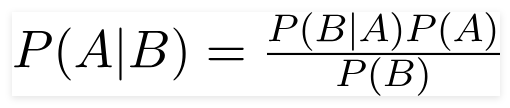

For many events, the denominator becomes a product of all the priors, it is also called **Evidence** and it remains constant for all, hence it can be ignored and proportionality can be observed inbetween neumerators.

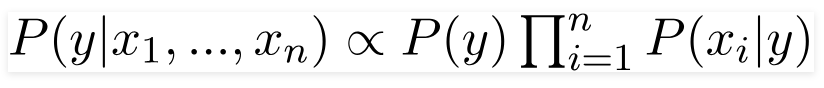

Now, y (the outcome) is either yes or no (occurence of an event or not occurance of the event), in multivarate case, y is the product of all the probabilities. 

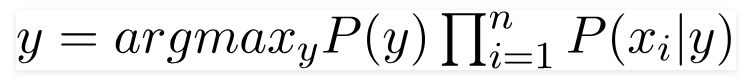

This product might become too small as we are dealing with probabilities and might end up being lost due to the discrete nature of of the way we store number in computers, i.e., undersampling, hence we make use of logs, which convert multiplication to Addition by remaining proportional.

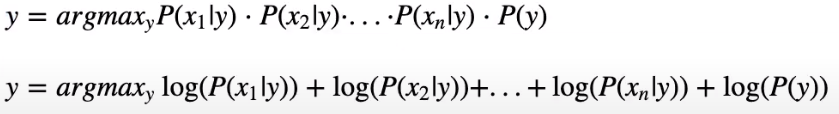

**Gaussian Naive Bayes**

There are various types of distributions (PDF) viz bernoulli, multinomial, Gaussian. We assume most of them are gaussian distributed due to the central limit theorem, we implement this gaussian distribution in the function by name :  _pdf

The Gaussian Distribution eqn is :

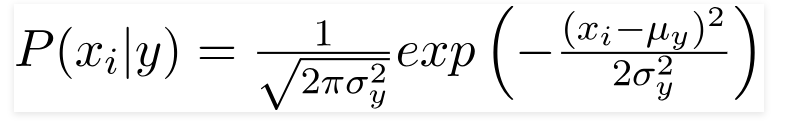

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
class naivebayes:
  def fit(self, X,y):
    n_samples, n_features = X.shape
    self._classes = np.unique(y)
    n_classes = len(self._classes)

    #create boxes to store the stastics, i.e., mean, variance and priors for each class
    self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
    self._var = np.zeros((n_classes, n_features), dtype=np.float64)
    self._priors =  np.zeros(n_classes, dtype=np.float64)

    #put values of stastics into the empty boxes
    for idx, c in enumerate(self._classes):
            X_c = X[y==c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

  def predict(self, X):
    y_pred = [self._predict(x) for x in X]     #taking help of a helper function, _predict
    return np.array(y_pred)

  def _predict(self, x):
    posteriors = []
        # calculate posterior probability for each class
    for idx, c in enumerate(self._classes):
       prior = np.log(self._priors[idx])
       posterior = np.sum(np.log(self._pdf(idx, x)))
       posterior = prior + posterior
       posteriors.append(posterior)

  def _pdf(self, class_idx, x):
     mean = self._mean[class_idx]
     var = self._var[class_idx]
     numerator = np.exp(- (x-mean)**2 / (2 * var))
     denominator = np.sqrt(2 * np.pi * var)
     return numerator / denominator

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

nb = naivebayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

print("Naive Bayes classification accuracy", accuracy(y_test, predictions))
